In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
import os
import zipfile
from google.colab import drive

drive.mount('/content/drive')
#See from directory where you upload the file
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Data/train.zip", 'r')
#Extract to your location
zip_ref.extractall("/content/drive/My Drive/Data/custom_object_detection/images")
zip_ref.close()
print("Successfully unzip")
print(len(os.listdir("/content/drive/My Drive/Data/custom_object_detection/images/train")))
'''

'\nimport os\nimport zipfile\nfrom google.colab import drive\n\ndrive.mount(\'/content/drive\')\n#See from directory where you upload the file\nzip_ref = zipfile.ZipFile("/content/drive/My Drive/Data/train.zip", \'r\')\n#Extract to your location\nzip_ref.extractall("/content/drive/My Drive/Data/custom_object_detection/images")\nzip_ref.close()\nprint("Successfully unzip")\nprint(len(os.listdir("/content/drive/My Drive/Data/custom_object_detection/images/train")))\n'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:

## importing required libraries
import os
import shutil
import random
import cv2
import matplotlib.pyplot as plt
import glob
import random




In [ ]:
path= "/content/drive/MyDrive/Data/custom_object_detection/"



train_path_img = "/content/drive/MyDrive/Data/custom_object_detection/images/train"
train_path_label = "/content/drive/MyDrive/Data/custom_object_detection/labels/train"
val_path_img = "/content/drive/MyDrive/Data/custom_object_detection/images/validation"
val_path_label = "/content/drive/MyDrive/Data/custom_object_detection/labels/validation"
test_path = "/content/drive/MyDrive/Data/custom_object_detection/test"




In [ ]:
'''
print("Number of images in training dataset:")
print(len(os.listdir(train_path_img)))
print("Number of labels in training dataset:")
print( len(os.listdir(train_path_label)))


print("Number of images in validation dataset:")
print(len(os.listdir(val_path_img)))
print("Number of labels in validation dataset:")
print(len(os.listdir(val_path_label)))

print("Number of images in test dataset:")
print(len(os.listdir(test_path)))
'''

'\nprint("Number of images in training dataset:")\nprint(len(os.listdir(train_path_img)))\nprint("Number of labels in training dataset:")\nprint( len(os.listdir(train_path_label)))\n\n\nprint("Number of images in validation dataset:")\nprint(len(os.listdir(val_path_img)))\nprint("Number of labels in validation dataset:")\nprint(len(os.listdir(val_path_label)))\n\nprint("Number of images in test dataset:")\nprint(len(os.listdir(test_path)))\n'


**Visualize Image from Dataset**

In [ ]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))

    all_images.sort()

    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

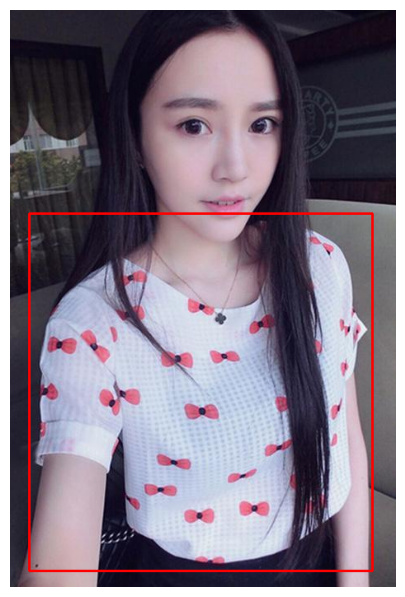

In [ ]:
# Visualize a few training images.
plot(
    image_paths='/content/drive/MyDrive/Data/custom_object_detection/images/train',
    label_paths='/content/drive/MyDrive/Data/custom_object_detection/labels/train',
    num_samples=1,
)

**Dataset YAML FILE**

10 Classes

In [ ]:
%%writefile fashion_v8.yaml
path: '/content/drive/MyDrive/Data/custom_object_detection/'
train: '/content/drive/MyDrive/Data/custom_object_detection/images/train'
val: '/content/drive/MyDrive/Data/custom_object_detection/images/validation'

# class names
nc: 10
names: ['A','B','C','D','E','F','G','H','I','J']


Overwriting fashion_v8.yaml


**Training**

Change EPPOCHS Size for better Model

Imgz Size can increase to 1280

In [ ]:
EPOCHS = 5
!yolo task=detect mode=train model=yolov8n.pt imgsz=640 data=fashion_v8.yaml epochs={EPOCHS} batch=8 name=yolov8n_v8_50e

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=fashion_v8.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

**Evaluation On Validation Image using fashion_v8.yaml**

In [ ]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50e2/weights/best.pt name=yolov8n_eval data=fashion_v8.yaml

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Data/custom_object_detection/labels/validation.cache... 3167 images, 0 backgrounds, 119 corrupt: 100% 3167/3167 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/Data/custom_object_detection/images/validation/000216.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: WARNING ⚠️ /content/drive/MyDrive/Data/custom_object_detection/images/validation/000838.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: WARNING ⚠️ /content/drive/MyDrive/Data/custom_object_detection/images/validation/000848.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 9. Possible class labels are 0-8
val: WARNING ⚠️ /content/drive/MyDrive/Data

**Export to tflite model so can use in Android Studio**

In [ ]:
model=YOLO("runs/detect/yolov8n_v8_50e2/weights/best.pt")

model.export("format="tflite)

**Inferencing On Evaluation Image**

Change source directory

Result is in Alphabet

Model path = runs/detect/yolov8n_v8_50e2/weights/best.pt

In [ ]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8n_v8_50e2/weights/best.pt \
source= /content/drive/MyDrive/Data/custom_object_detection/images/validation \
imgsz=640 \
name=yolov8n_v8_50e_infer1280 \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/3167 /content/drive/MyDrive/Data/custom_object_detection/images/validation/000012.jpg: 640x384 (no detections), 114.2ms
image 2/3167 /content/drive/MyDrive/Data/custom_object_detection/images/validation/000029.jpg: 384x640 1 E, 1 F, 116.7ms
image 3/3167 /content/drive/MyDrive/Data/custom_object_detection/images/validation/000043.jpg: 640x480 (no detections), 115.1ms
image 4/3167 /content/drive/MyDrive/Data/custom_object_detection/images/validation/000045.jpg: 640x480 1 E, 1 G, 6.8ms
image 5/3167 /content/drive/MyDrive/Data/custom_object_detection/images/validation/000048.jpg: 640x480 1 E, 6.6ms
image 6/3167 /content/drive/MyDrive/Data/custom_object_detection/images/validation/000052.jpg: 384x

**Inferencing On own Images**

In [ ]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8n_v8_50e2/weights/best.pt \
source= /content/drive/MyDrive/Data/custom_object_detection/images_ootd\
imgsz=640 \
name=yolov8n_v8_50e_inferootd \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(1).jpg: 640x544 1 A, 1 B, 1 G, 126.2ms
image 2/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(10).jpg: 640x512 1 B, 1 C, 1 F, 115.9ms
image 3/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(11).jpg: 640x384 1 F, 1 J, 115.9ms
image 4/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(12).jpg: 640x416 1 B, 1 F, 114.9ms
image 5/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(13).jpg: 640x640 1 B, 1 C, 1 F, 8.2ms
image 6/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(14).jpg: 640x544 1

**Copy the result to drive**

In [ ]:
!cp -r /content/runs/detect/yolov8n_v8_50e_inferootd /content/drive/MyDrive/Data/custom_object_detection/output


**Export Trained Weight for future Reference**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cp /content/runs/detect/yolov8n_v8_50e2/weights/best.pt  /content/drive/MyDrive/Data/custom_object_detection/Model
print("Successfully Saved")


Successfully Saved


**Testing By Using the model Saved in drive on model**

In [ ]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/Data/custom_object_detection/Model/best.pt \
source= /content/drive/MyDrive/Data/custom_object_detection/images_ootd\
imgsz=640 \
name=yolov8n_v8_50e_inferootd \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(1).jpg: 640x544 1 A, 1 B, 1 G, 114.8ms
image 2/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(10).jpg: 640x512 1 B, 1 C, 1 F, 115.5ms
image 3/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(11).jpg: 640x384 1 F, 1 J, 112.9ms
image 4/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(12).jpg: 640x416 1 B, 1 F, 113.2ms
image 5/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(13).jpg: 640x640 1 B, 1 C, 1 F, 7.5ms
image 6/15 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(14).jpg: 640x544 1

**Cropped Item Image Into their own label and saved to directory**


image 1/1 /content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(10).jpg: 640x512 1 B, 1 C, 1 F, 292.3ms
Speed: 5.9ms preprocess, 292.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)
Image0


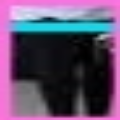

Successfully Saved to directory
Image1


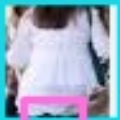

Successfully Saved to directory
Image2


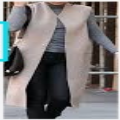

Successfully Saved to directory


In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

import cv2

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/Data/custom_object_detection/Model/best.pt')

# Perform inference on an image
results = model('/content/drive/MyDrive/Data/custom_object_detection/images_ootd/download(10).jpg')

# Load the original image
image = '/content/drive/MyDrive/Data/custom_object_detection/output/yolov8n_v8_50e_inferootd/download(10).jpg'
img = cv2.imread(image)

path = '/content/drive/MyDrive/Data/custom_object_detection/output/separate/'

# Extract bounding boxes
boxes = results[0].boxes.xyxy.tolist()

# Iterate through the bounding boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    # Crop the object using the bounding box coordinates
    ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
    print("Image" + str(i))
    bigger = cv2.resize(ultralytics_crop_object, (120, 120))
    cv2_imshow(bigger)

    #Save crop image
    print("Successfully Saved to directory")
    cv2.imwrite(path+ 'ultralytics_crop_' + str(i) + '.jpg', ultralytics_crop_object)



In [ ]:
'''
import cv2
from google.colab.patches import cv2_imshow

# Read the original image
img = cv2.imread('/content/drive/MyDrive/Data/custom_object_detection/output/yolov8n_v8_50e_inferootd/download(5).jpg')
# Display original image
cv2_imshow(img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
print(sobelx)
cv2_imshow( sobelx)
cv2.waitKey(0)
cv2_imshow(sobely)
cv2.waitKey(0)
cv2_imshow(sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow(edges)
cv2.waitKey(0)



cv2.destroyAllWindows()
'''

"\nimport cv2 \nfrom google.colab.patches import cv2_imshow\n\n# Read the original image\nimg = cv2.imread('/content/drive/MyDrive/Data/custom_object_detection/output/yolov8n_v8_50e_inferootd/download(5).jpg') \n# Display original image\ncv2_imshow(img)\ncv2.waitKey(0)\n \n# Convert to graycsale\nimg_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n# Blur the image for better edge detection\nimg_blur = cv2.GaussianBlur(img_gray, (3,3), 0) \n\n# Sobel Edge Detection\nsobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis\nsobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis\nsobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection\n# Display Sobel Edge Detection Images\nprint(sobelx)\ncv2_imshow( sobelx)\ncv2.waitKey(0)\ncv2_imshow(sobely)\ncv2.waitKey(0)\ncv2_imshow(sobelxy)\ncv2.waitKey(0)\n \n# Canny Edge Detection\nedge

In [ ]:
'''
!yolo task=detect mode=predict model=runs/detect/yolov8n_v8_50e/weights/best.pt del= conf=0.55 source=/content/drive/MyDrive/Data/custom_object_detection/test
'''